# <center><font color=blue>Fuzzy C means Clustering </font>

<font size=4>Use the data provided in the file “clustering_assignmentData.csv” where we know that there are three clusters from the labels (K = 3). Apply Fuzzy C-means algorithm on the data provied where each row in the file corresponds to one data point. <br> <br>

Important Notes:  <br>One important aspect of fuzzy c means that changes the results significantly is the initialization. So you should run the fuzzy c-means algorithm with the given initialization below above 100 times. The final output of the clustering is the result that gives the minimum  J.
One possible startegy for intialization cluster centers is to select the furthest points from each other. 
it's required to try clustering with different q (the fuzziness Index and visualize the results)
</font>


# <font color=blue> Deliverables: </font>

<font size=4>
• This file after including your code <br>
• A plot of the points provided in the dataset after clustering showing the three identified clusters. For this plot, use the best clustering result out of 100 trials you did and for different q”. </font>

# <center><font color=blue>Solution </font>

<font color=blue size=4>1-Needed Packages

In [86]:
import numpy as np
import matplotlib.pylab as plt
import math
import pandas as pd
from numpy.random import seed
import sys
ep = sys.float_info.epsilon

<font color=blue size=4>2-Load Data

In [87]:
data_loaded = pd.read_csv(r'clustering_assignmentData.csv')
print('Data Head :- \n', data_loaded.head())

Data Head :- 
          X1        X2  y
0 -3.375615  3.632363  1
1 -3.618828  3.786279  1
2 -3.485530  0.464121  0
3 -2.422184  2.101777  1
4 -2.127235  2.142973  1


In [88]:
def Random_Select(data):
    # Randomly select 3 indices from the dataset
    indices = np.random.choice(data.shape[0], size=3, replace=False)

    # Extract the values (not the index or column names)

    m1, m2, m3 = data[indices]

    return m1,m2,m3 

# Run the Random Select function and print the initial 3-means
m1,m2,m3 = Random_Select(data)
m1,m2,m3


(array([-3.611718  ,  2.10729892]),
 array([-3.54231188,  2.06402777]),
 array([-3.49655436,  1.50786151]))

In [89]:
def Membership(data,m1,m2,m3, q):
    # Extract feature columns (X1, X2) for calculations
    k_clusters = 3 # cluster number (as shared 3 means)
    
    # Initialize an array to store the assignments (r_nk)
    rnk = np.zeros((len(data), k_clusters)) 
 
    for i in range(len(data)):
        d1 = np.linalg.norm(data[i] - m1) + ep
        d2 = np.linalg.norm(data[i] - m2) + ep
        d3 = np.linalg.norm(data[i] - m3) + ep
        distances = np.array([d1, d2, d3])
        
        for k in range(k_clusters):
            rnk[i, k] = 1.0 / np.sum((distances[k] / distances) ** (2 / (q - 1)))
        assert np.isclose(np.sum(rnk[i, :]), 1.0)

    assert rnk.shape == (len(data), 3)

    return rnk

# Test the Membership function
rnk = Membership(data,m1,m2,m3, 3)
rnk

array([[0.36986281, 0.36190414, 0.26823306],
       [0.36903403, 0.35941082, 0.27155515],
       [0.27713991, 0.28529391, 0.43756617],
       ...,
       [0.32336175, 0.32779319, 0.34884506],
       [0.32038091, 0.32821488, 0.35140421],
       [0.32336552, 0.32803371, 0.34860077]])

In [90]:
def Update_Means(data, rnk, q):
    k_clusters = 3  # cluster number (as shared 3 means)
    
    # Initialize an array to store the new means
    m = np.zeros((k_clusters, data.shape[1]))
    
    for k in range(k_clusters):
        numerator = np.sum((rnk[:, k] ** q).reshape(-1, 1) * data, axis=0)
        denominator = np.sum(rnk[:, k] ** q)
        m[k, :] = numerator / denominator
    
    assert m.shape == (k_clusters, data.shape[1])
    m1 = m[0]
    m2 = m[1]
    m3 = m[2]

    return m1, m2, m3

# Test the Update_Means function
m1, m2, m3 = Update_Means(data, rnk, 3)
m1, m2, m3

(array([-1.79676515,  1.27953174]),
 array([-1.71313471,  1.21069983]),
 array([-2.01599591,  0.77781955]))

In [91]:
def Objective_Function(data, rnk, m1, m2, m3, q):
    """
    This function should implement  objective Function in slide 13,Lec 6
    
    Input: Dataset, memership matrix, 3-means, and the fuzzines index
    Return: Total Average Distance
    """
    
    # Ensure centroids are NumPy arrays
    m1, m2, m3 = np.array(m1), np.array(m2), np.array(m3)

    # Combine centroids into a single array for indexing
    centroids = np.array([m1, m2, m3])

    # Initialize total distance
    total_distance = 0
    
    # Compute the total distance using the objective function formula
    for n, x_n in enumerate(data):
        for k, m_k in enumerate(centroids):
            total_distance += (rnk[n, k] ** q) * np.linalg.norm(x_n - m_k) ** 2

    # Compute average distance
    Avgdist = total_distance / len(data)
    
    return Avgdist

# Test the Objective_Function function
Objective_Function(data, rnk, m1, m2, m3, 3)

0.8360172874344911

In [92]:
def Stopping_Criteria(m1_b,m2_b,m3_b,m1,m2,m3):
    # Compute the difference between the old and new means
    diff1 = np.linalg.norm(m1_b - m1)
    diff2 = np.linalg.norm(m2_b - m2)
    diff3 = np.linalg.norm(m3_b - m3)
    
    threshold = 1e-6 # Define a threshold for convergence
    
    # convergence test
    if diff1 < threshold and diff2 < threshold and diff3 < threshold:
        return True
    else:
        return False

# Test the Stopping_Criteria function
m1_b, m2_b, m3_b = np.array([-3.4, 2.1]), np.array([-2.8, 2.5]), np.array([0.2, -0.3])
m1, m2, m3 = np.array([[-3.401, 2.101]]), np.array([[-2.803, 2.502]]), np.array([[0.201, -0.301]])
Stopping_Criteria(m1_b, m2_b, m3_b, m1, m2, m3)


False

In [93]:
#________________________Main Code Statrs here___________________________________
def myFCM(data, q):
        assert q > 1
        m1f,m2f,m3f=np.zeros((2,100)),np.zeros((2,100)),np.zeros((2,100)) # 3 - Means 

        Avgdist=np.zeros((100,))
        counter=0

        while(counter <100):
            
                # --------------------Intialization Step 1------------------------------#
                seed(counter)
                m1,m2,m3 = Random_Select(data)

                rnk = np.zeros(len(data)) # Membership Vector

                m1_b = m1
                m2_b = m2
                m3_b = m3
                cc = 0
                while(True):
                    #---------------Step 2 compute rnk-----------------------------------------#

                    rnk = Membership(data,m1,m2,m3, q)

                    assert all(np.round(np.sum(rnk, axis = 1), 2) == np.ones(len(rnk)))

                    #---------------Step 3 update means-----------------------------------------#

                    m1,m2,m3 = Update_Means(data,rnk, q)

                    #---------------Step 4 Test Convergence -----------------------------------------#

                    if Stopping_Criteria(m1_b,m2_b,m3_b,m1,m2,m3):
                         m1f[:,counter],m2f[:,counter],m3f[:,counter] = m1,m2,m3

                         Avgdist[counter] = Objective_Function(data,rnk,m1,m2,m3, q)
                         break


                    m1_b = m1
                    m2_b = m2
                    m3_b = m3

                counter += 1     

        idx = np.argmin(Avgdist)
        m1_ = m1f[:,idx]
        m2_ = m2f[:,idx]
        m3_ = m3f[:,idx]
        rnk_=np.argmax(Membership(data,m1_,m2_,m3_, q), axis = 1)
        return rnk_, m1_, m2_, m3_


In [123]:
# Load Data
df = pd.read_csv('clustering_assignmentData.csv')
data = df[['X1', 'X2']].values
y = df['y'].values

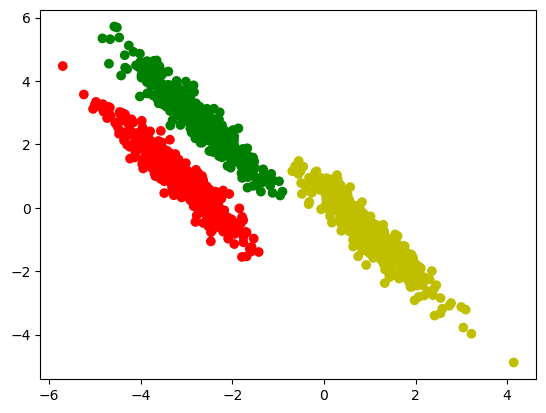

In [95]:
plt.scatter(data[:, 0],data[:, 1], color = list(map(lambda x: {0:'r', 1: 'g', 2: 'y'}.get(x), y)))

# Plotting 

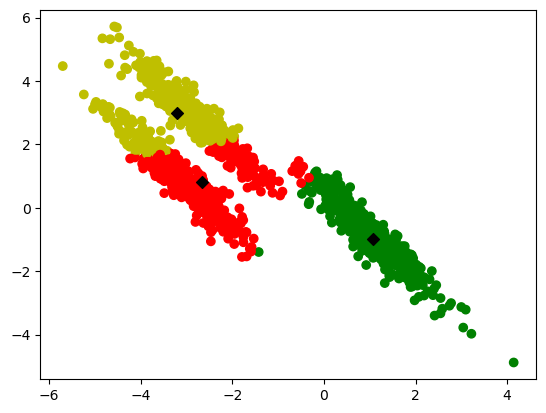

In [96]:
# Plotting the Final Centroids and data. 
q  =2
rnk_ , m1_, m2_, m3_= myFCM(data, q)
plt.scatter(data[:, 0],data[:, 1], color = list(map(lambda x: {0:'r', 1: 'g', 2: 'y'}.get(x), rnk_)))
plt.scatter([m1_[0], m2_[0],m3_[0]],[m1_[1], m2_[1], m3_[1]], marker = 'D', c = 'black')


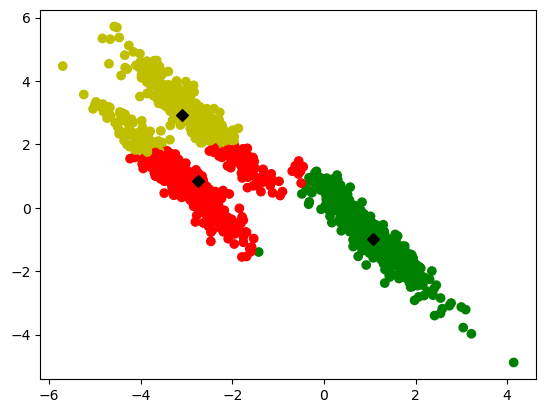

In [97]:
q = 3
rnk_ , m1_, m2_, m3_= myFCM(data, q)

plt.scatter(data[:, 0],data[:, 1], color = list(map(lambda x: {0:'r', 1: 'g', 2: 'y'}.get(x), rnk_)))
plt.scatter([m1_[0], m2_[0],m3_[0]],[m1_[1], m2_[1], m3_[1]], marker = 'D', c = 'black')

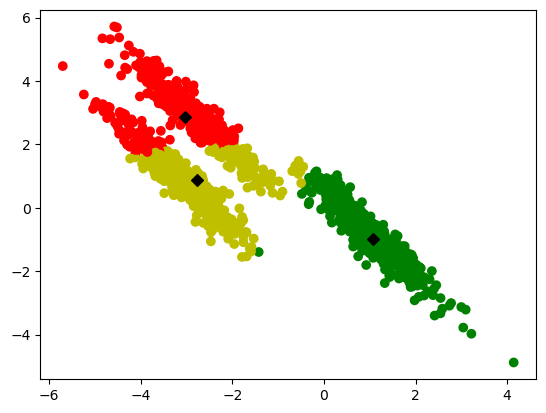

In [98]:
q = 4
rnk_ , m1_, m2_, m3_= myFCM(data, q)

plt.scatter(data[:, 0],data[:, 1], color = list(map(lambda x: {0:'r', 1: 'g', 2: 'y'}.get(x), rnk_)))
plt.scatter([m1_[0], m2_[0],m3_[0]],[m1_[1], m2_[1], m3_[1]], marker = 'D', c = 'black')

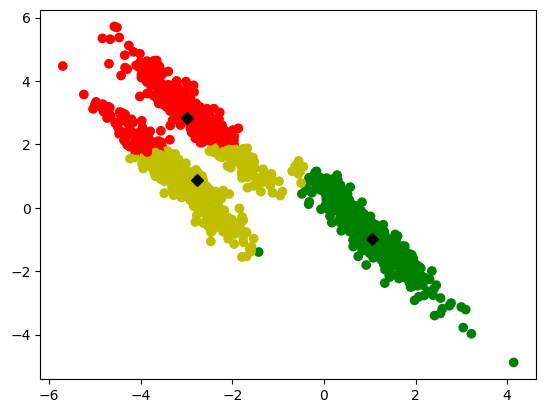

In [99]:
q = 5
rnk_ , m1_, m2_, m3_= myFCM(data, q)

plt.scatter(data[:, 0],data[:, 1], color = list(map(lambda x: {0:'r', 1: 'g', 2: 'y'}.get(x), rnk_)))
plt.scatter([m1_[0], m2_[0],m3_[0]],[m1_[1], m2_[1], m3_[1]], marker = 'D', c = 'black')

## Task 4: Compare Fuzzy C-Means with K-Means

- Implement K-Means clustering and compare its performance with FCM.
- Discuss scenarios where FCM performs better than K-Means.

Converged in 16 iterations


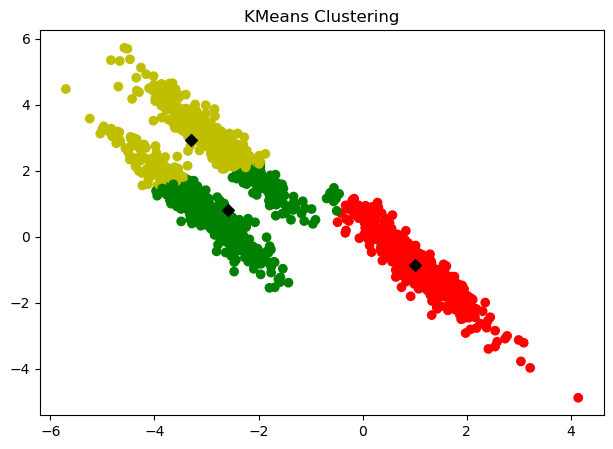

In [115]:
# Implement K-Means clustering algorithm
def KMeans(data, k=3, max_iter=100, tolerance=1e-6):
    """
    KMeans clustering algorithm.
    
    Parameters:
        data: The dataset to cluster.
        k: The number of clusters.
        max_iter: The maximum number of iterations.
        tolerance: The stopping criterion (minimum centroid change).
    
    Returns:
        centroids: The final centroids.
        labels: The cluster assignments for each data point.
    """
    # Step 1: Randomly select k centroids
    centroids = Random_Select(data)

    for iteration in range(max_iter):
        # Step 2: Assign points to the closest centroid (hard assignment)
        distances = np.array([[np.linalg.norm(point - centroid) for centroid in centroids] for point in data])
        labels = np.argmin(distances, axis=1)  # Assign each point to the nearest centroid

        # Step 3: Update centroids (mean of points assigned to each cluster)
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Step 4: Check for convergence (if centroids do not change)
        if np.all(np.abs(new_centroids - centroids) < tolerance):
            print(f"Converged in {iteration+1} iterations")
            break

        centroids = new_centroids

    return centroids, labels

centroids_kmeans, labels_kmeans = KMeans(data, k=3)

# KMeans Plot
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 2)
plt.scatter(data[:, 0], data[:, 1], c=[{0: 'r', 1: 'g', 2: 'y'}[x] for x in labels_kmeans])
plt.scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], marker='D', c='black')
plt.title("KMeans Clustering")
plt.show()

# Perfomance Comaparison

FC-Means is more accurate, and precise than the regular K-Means because:-

- K-Means
Assigns each point to exactly one cluster.
Simple, fast, and scalable.
May struggle with complex shapes or overlapping clusters.

- Fuzzy C-Means (FCM)
Each point belongs to multiple clusters with different membership levels.
Captures uncertainty and overlap between clusters.
Better for datasets where clusters are not well-separated or have soft boundaries.

Summary:
- Using K-Means when speed and simplicity are critical, and clusters are well-separated.
- Choosing FCM for more sophisticated scenarios where flexibility and interpretability of cluster memberships matter.

# Discussion

FCM Performs Better
- Overlapping Clusters: FCM handles overlapping clusters more gracefully due to its probabilistic membership assignments.
- Fuzzy Boundaries: In datasets with gradual transitions between clusters, FCM offers a more nuanced classification.
- Complex Data Structures: For data with noise or outliers where strict boundaries are hard to define, FCM’s flexibility makes it preferable.